In [40]:
import sklearn.metrics
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from hpsklearn import estimator, components
import matplotlib.pyplot as plt
%matplotlib inline
from hyperopt import tpe
import fonctions_auxiliaires as aux
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Kaggle_YourCabs_training.csv',delimiter=',')
score = pd.read_csv('Kaggle_YourCabs_score.csv',delimiter=',')

In [4]:
y = data['Car_Cancellation']
COE = data['Cost_of_error']

del data['Car_Cancellation']
del data['Cost_of_error']
del data['id']

data.columns = data.columns.str.replace('from_date','from_date_date')
data.columns = data.columns.str.replace('booking_created','booking_created_date')

data['from_date_hour'] = None
data['booking_created_hour'] = None

In [5]:
for index in data.index : 
    
    if(index%5000 == 0) :
        print(index)
    
    fdd , fdh = data.loc[index]['from_date_date'].split(' ')
    bcd , bch =  data.loc[index]['booking_created_date'].split(' ')
    
    data.set_value(index=index, col='from_date_date' , value=fdd)
    data.set_value(index=index, col='from_date_hour' , value=fdh)
    
    data.set_value(index=index, col='booking_created_date' , value=bcd)
    data.set_value(index=index, col='booking_created_hour' , value=bch)    

0
5000
10000
15000
20000
25000
30000
35000
40000


In [6]:
del score['Unnamed: 18']
del score['Unnamed: 19']
del score['id']

score.columns = score.columns.str.replace('from_date','from_date_date')
score.columns = score.columns.str.replace('booking_created','booking_created_date')

score['from_date_hour'] = None
score['booking_created_hour'] = None

In [7]:
for index in score.index : 
    
    if(index%5000 == 0) :
        print(index)
    
    fdd , fdh = score.loc[index]['from_date_date'].split(' ')
    bcd , bch =  score.loc[index]['booking_created_date'].split(' ')
    
    score.set_value(index=index, col='from_date_date' , value=fdd)
    score.set_value(index=index, col='from_date_hour' , value=fdh)
    
    score.set_value(index=index, col='booking_created_date' , value=bcd)
    score.set_value(index=index, col='booking_created_hour' , value=bch)    

0
5000


In [8]:
le_fdd = LabelEncoder()
le_bcd = LabelEncoder()
le_fdh = LabelEncoder()
le_bch = LabelEncoder()

data.from_date_date = le_fdd.fit_transform(data.from_date_date)
data.from_date_hour = le_fdh.fit_transform(data.from_date_hour)
data.booking_created_date = le_bcd.fit_transform(data.booking_created_date)
data.booking_created_hour = le_bch.fit_transform(data.booking_created_hour)

score.from_date_date = le_fdd.fit_transform(score.from_date_date)
score.from_date_hour = le_fdh.fit_transform(score.from_date_hour)
score.booking_created_date = le_bcd.fit_transform(score.booking_created_date)
score.booking_created_hour = le_bch.fit_transform(score.booking_created_hour)

In [9]:
data.set_index(['user_id']).to_csv('Cab-training.csv')

In [10]:
class_1 = set(y[y==1].index)
class_0 = set(y[y==0].index)
train_set_indices = set()
test_set_indices = set()

In [11]:
for element in class_0 :    
    if (np.random.uniform(0, 1) > 0.2) : 
        train_set_indices.add(element)
    else : 
        test_set_indices.add(element)
        
for element in class_1 :    
    if (np.random.uniform(0, 1) > 0.2) : 
        train_set_indices.add(element)
    else : 
        test_set_indices.add(element)   

In [12]:
X_train = data.loc[train_set_indices]
X_test = data.loc[test_set_indices]

y_train  = y.loc[train_set_indices]
y_test = y.loc[test_set_indices]

In [13]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

### General results

In [15]:
estim = estimator.hyperopt_estimator(classifier=components.any_classifier('clf'),algo=tpe.suggest,trial_timeout=300, \
                                    fit_increment =1, fit_increment_dump_filename='cab_logfile')

In [16]:
estim.fit(np.ascontiguousarray(X_train),np.ascontiguousarray(y_train))

In [17]:
y = estim.predict(X_test)

In [18]:
metrics_cab = aux.metrics(estim, X_train, y_train, X_test, y_test, y)

In [19]:
metrics_cab

(0.99997122384967341,
 0.93698156682027645,
 0.99329525701514776,
 0.94195219592605672,
 0.96694264821417786)

In [20]:
estim.best_model()

{'ex_preprocs': (),
 'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=None, max_features='log2', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=107, n_jobs=1,
             oob_score=False, random_state=1, verbose=False,
             warm_start=False),
 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=False),)}

In [21]:
aux.time_retriever(estim)

{0: 1482222335.0,
 1: 1482222395.0,
 2: 1482222400.0,
 3: 1482222401.0,
 4: 1482222478.0,
 5: 1482222518.0,
 6: 1482222574.0,
 7: 1482222875.0,
 8: 1482222880.0,
 9: 1482222892.0}

TypeError: unorderable types: float() <= NoneType()

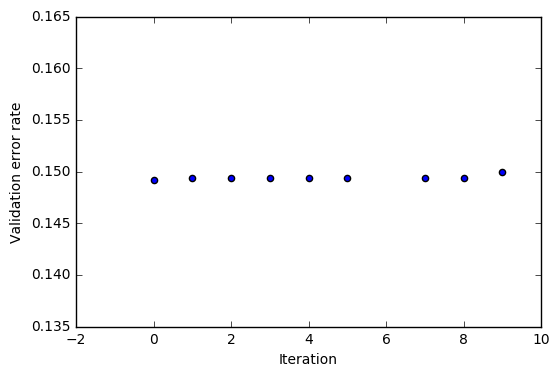

In [23]:
aux.plot_perf(estim)

In [24]:
estim.trials.trials

[{'book_time': datetime.datetime(2016, 12, 20, 9, 25, 35, 382000),
  'exp_key': None,
  'misc': {'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'idxs': {'clf': [0],
    'clf.ada_boost.ada_boost_algo': [],
    'clf.ada_boost.ada_boost_learning_rate': [],
    'clf.ada_boost.ada_boost_n_estimators': [],
    'clf.ada_boost.ada_boost_rstate': [],
    'clf.extra_trees.etc_bootstrap': [],
    'clf.extra_trees.etc_criterion': [],
    'clf.extra_trees.etc_max_depth': [],
    'clf.extra_trees.etc_max_features': [],
    'clf.extra_trees.etc_max_features.frac': [],
    'clf.extra_trees.etc_min_samples_leaf': [],
    'clf.extra_trees.etc_min_samples_leaf.gt1': [],
    'clf.extra_trees.etc_n_estimators': [],
    'clf.extra_trees.etc_rstate': [],
    'clf.grad_boosting.gradient_boosting_learning_rate': [],
    'clf.grad_boosting.gradient_boosting_max_depth': [],
    'clf.grad_boosting.gradient_boosting_max_features': [],
    'clf.grad_boosting.gradient_boosting_max_features.frac': [],
    'clf.g

In [25]:
class_values['clf']

NameError: name 'class_values' is not defined

In [26]:
alldata = estim.trials.trials

In [27]:
alldata[1]['misc']['vals'].values()

dict_values([[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [4], [], [], [], [2], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [16.0], [], [], [4], [], [], [0.23868217376008913], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [1], [], [], []])

### Intermediate results

In [47]:
estim_iter = estimator.hyperopt_estimator(classifier=components.any_classifier('clf'),algo=tpe.suggest, trial_timeout= 300)

In [48]:
predictions, accuracies = aux.fit_intermediate(estim_iter, np.ascontiguousarray(X_train), np.ascontiguousarray(y_train),\
                                              X_test, y_test)

Trial 1 loss: 0.14933103150625804
Trial 2 loss: 0.14933103150625804
Trial 3 loss: 0.15350309308013232
Trial 4 loss: 0.6645087037836283
Trial 5 loss: 0.14933103150625804
Trial 6 loss: 0.7065170479067759
Trial 7 loss: 0.14933103150625804
Trial 8 loss: 0.16918429003021151
Trial 9 loss: 0.14933103150625804
Trial 10 loss: 0.14933103150625804
Test accuracy: 0.927880184332
Predict: [0 0 0 ..., 0 0 0]
Best Model: {'ex_preprocs': (), 'preprocs': (Normalizer(copy=True, norm='l2'),), 'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=743, n_jobs=1,
            oob_score=False, random_state=0, verbose=False,
            warm_start=False)}
====End of demo====


In [49]:
metrics_iter = []
for i in range(0, len(predictions)-1):
    y = predictions[i]
    metrics_iter.append(aux.metrics(estim_iter, X_train, y_train, X_test, y_test, y))


In [50]:
metrics_iter

[(0.92788696728151709,
  0.9278801843317972,
  1.0,
  0.9278801843317972,
  0.96259113182741718),
 (0.92788696728151709,
  0.9278801843317972,
  1.0,
  0.9278801843317972,
  0.96259113182741718),
 (0.92788696728151709,
  0.9278801843317972,
  1.0,
  0.9278801843317972,
  0.96259113182741718),
 (0.92788696728151709,
  0.9278801843317972,
  1.0,
  0.9278801843317972,
  0.96259113182741718),
 (0.92788696728151709,
  0.9278801843317972,
  1.0,
  0.9278801843317972,
  0.96259113182741718),
 (0.92788696728151709,
  0.9278801843317972,
  1.0,
  0.9278801843317972,
  0.96259113182741718),
 (0.92788696728151709,
  0.9278801843317972,
  1.0,
  0.9278801843317972,
  0.96259113182741718),
 (0.92788696728151709,
  0.9278801843317972,
  1.0,
  0.9278801843317972,
  0.96259113182741718),
 (0.92788696728151709,
  0.9278801843317972,
  1.0,
  0.9278801843317972,
  0.96259113182741718)]

In [51]:
predictions

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

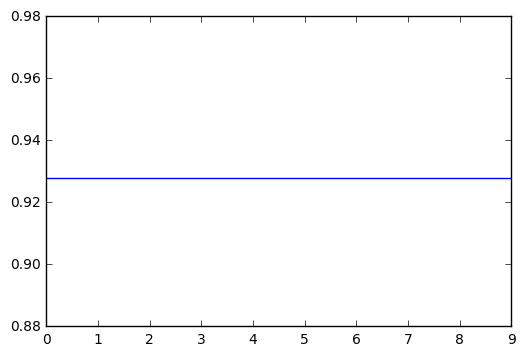

In [52]:
plt.plot(accuracies)
plt.show()

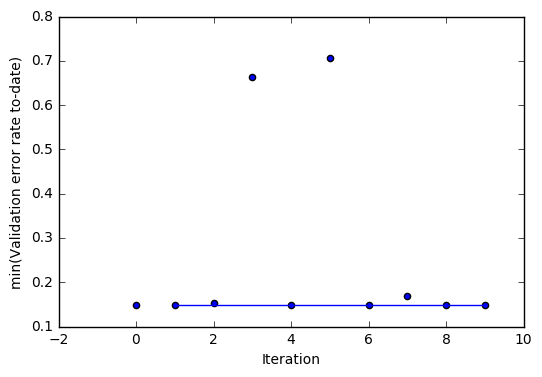

In [53]:
aux.plot_perf(estim_iter)